In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fit=np.ndarray.tolist(np.load("fit.npy",allow_pickle=True))
param_names = ["Tstar","logLstar","logMdisk","logRdisk","h0","logRin","gamma",\
               "beta","logMenv","logRenv","fcav","ksi","logamax","p","incl"]
priors=np.load("./priors.npy")

In [15]:
pa=[1,2,5,8,13]
w=2
v=0

lname="dy_"
for i in pa:
    lname+=str(i)
lname+="_w"+str(w)
lname+="_v"+str(v)

fname="dy_"
for i in pa:
    fname+=str(i)
fname+="_w"+str(w)
fname+="_v"+str(v)

ns=np.load("./"+lname+"/dynesty_newsamples.npy")
colors= plt.cm.viridis(np.linspace(0,1,5))

for i in range(len(pa)):
    fit[pa[i]].append({"dist":np.quantile(ns[:,1+i],[.025,.50,.975]), \
                    'label':fname})

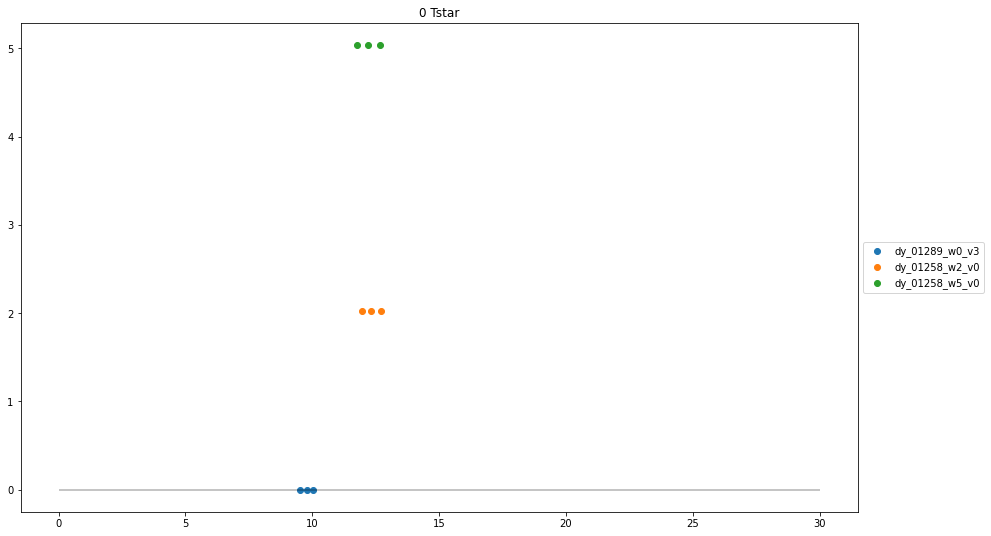

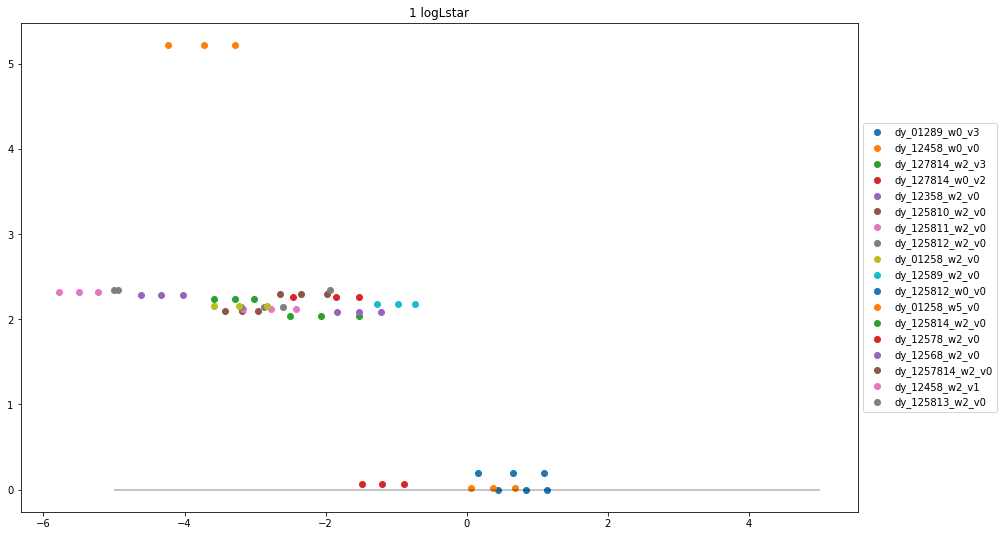

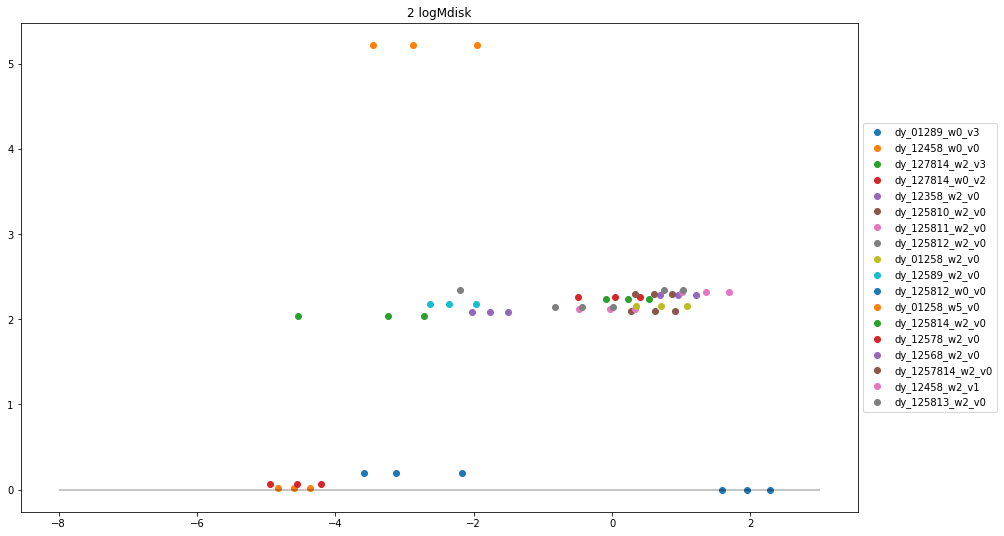

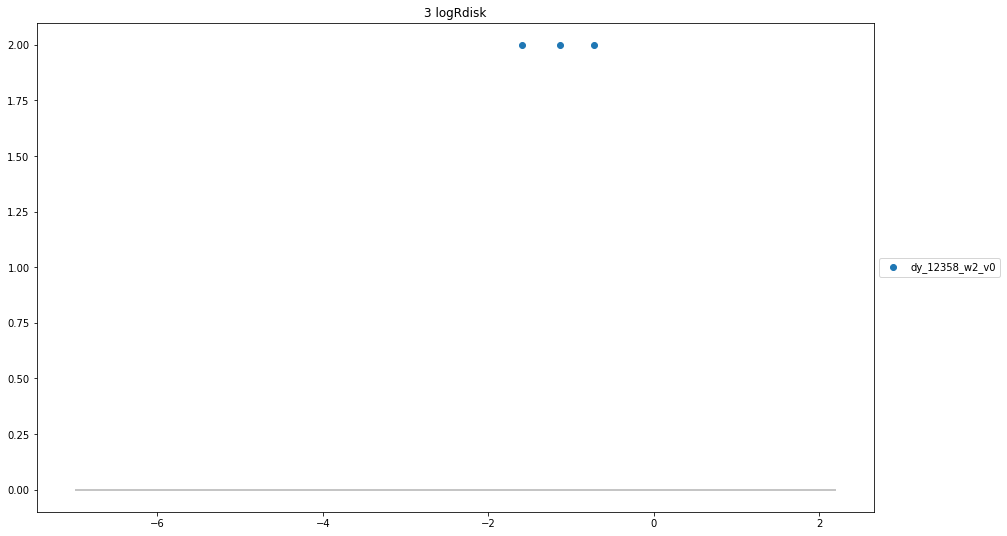

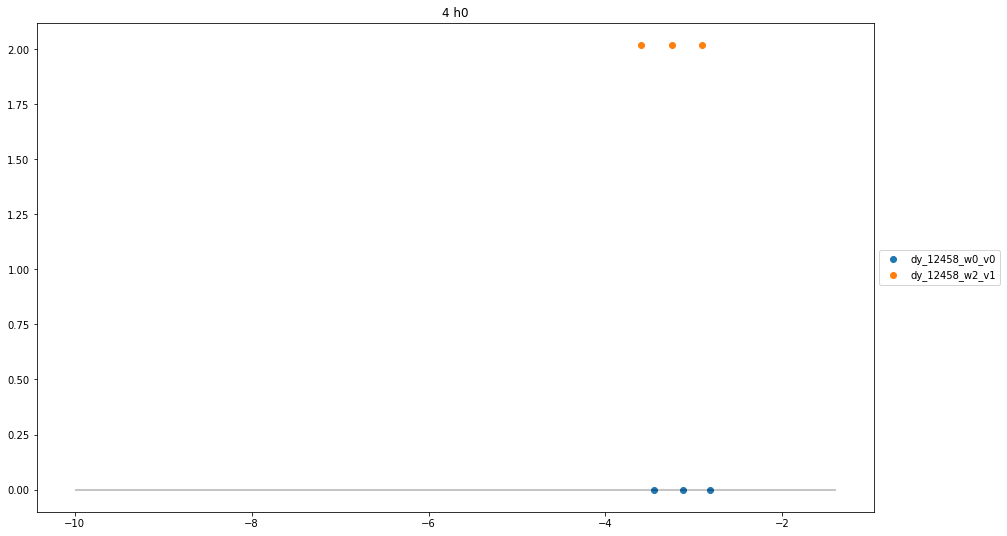

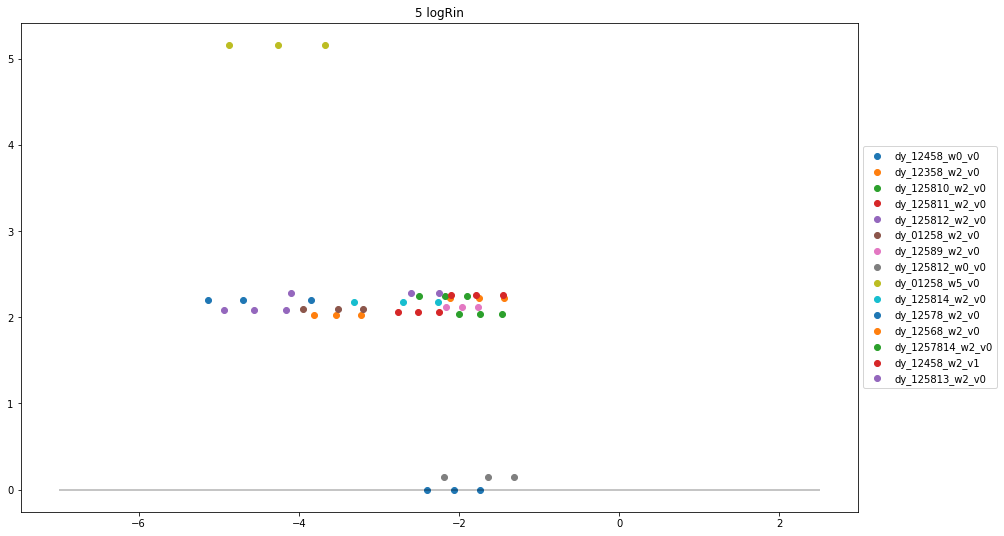

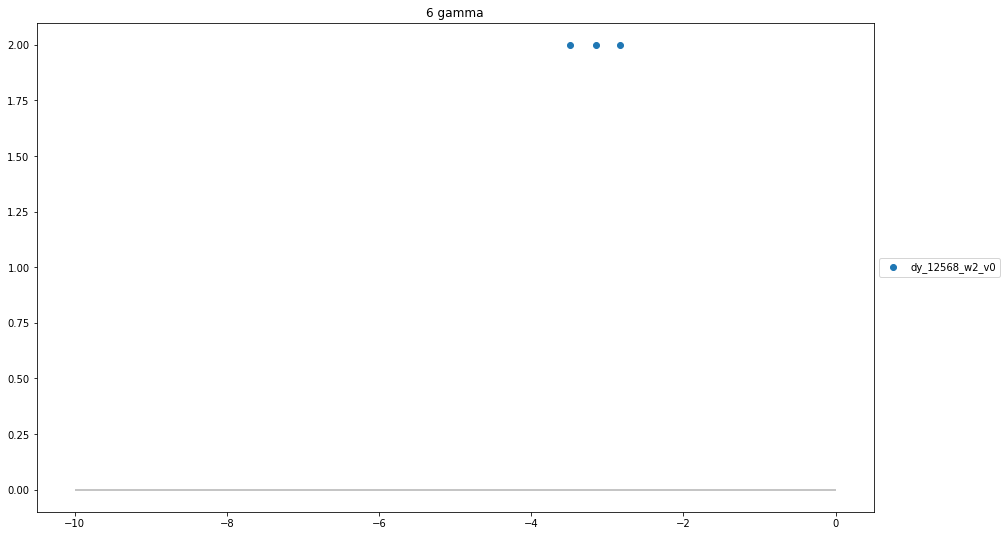

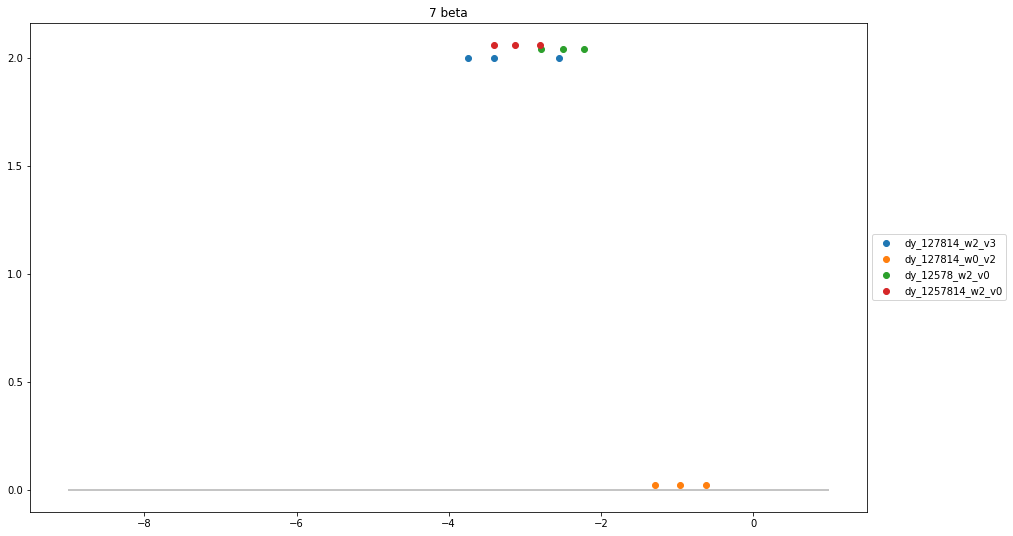

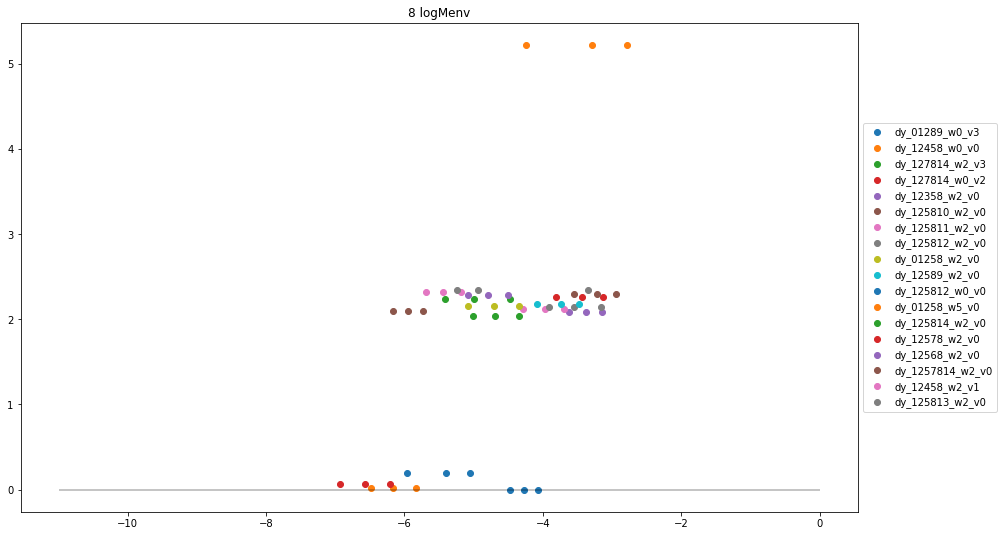

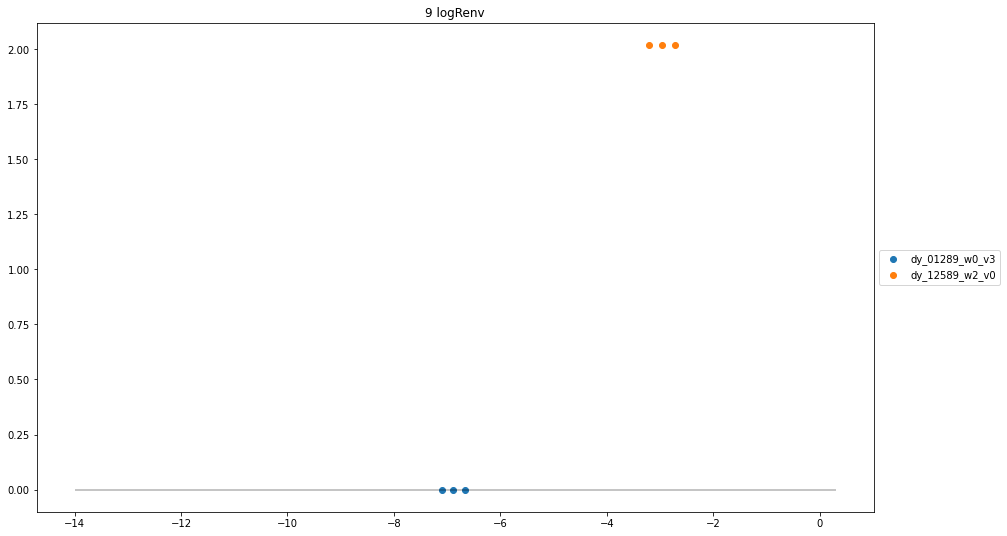

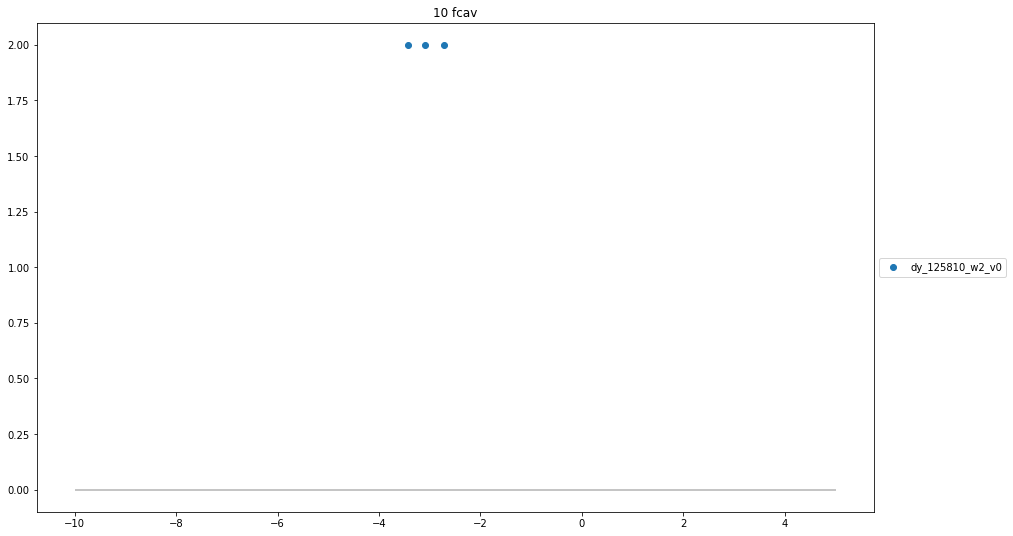

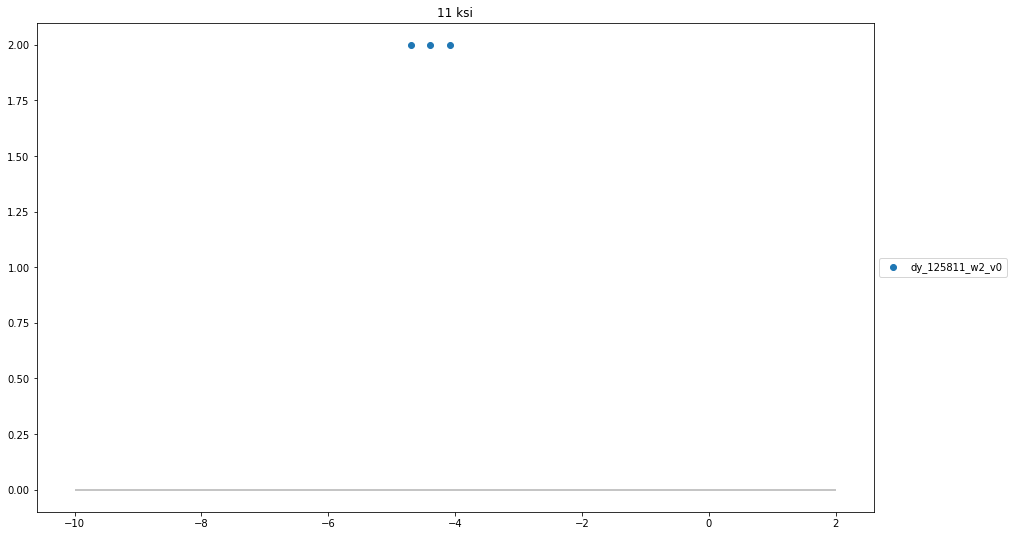

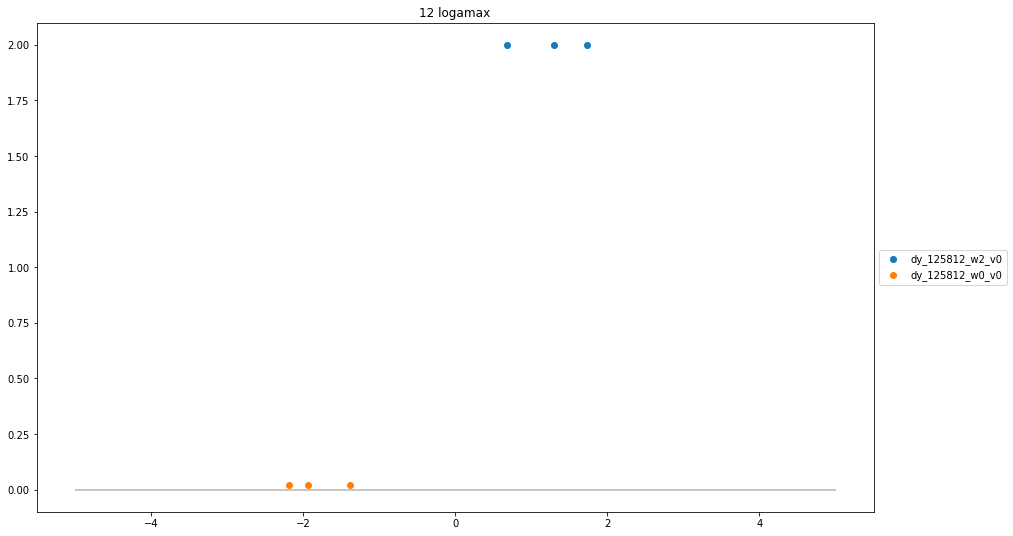

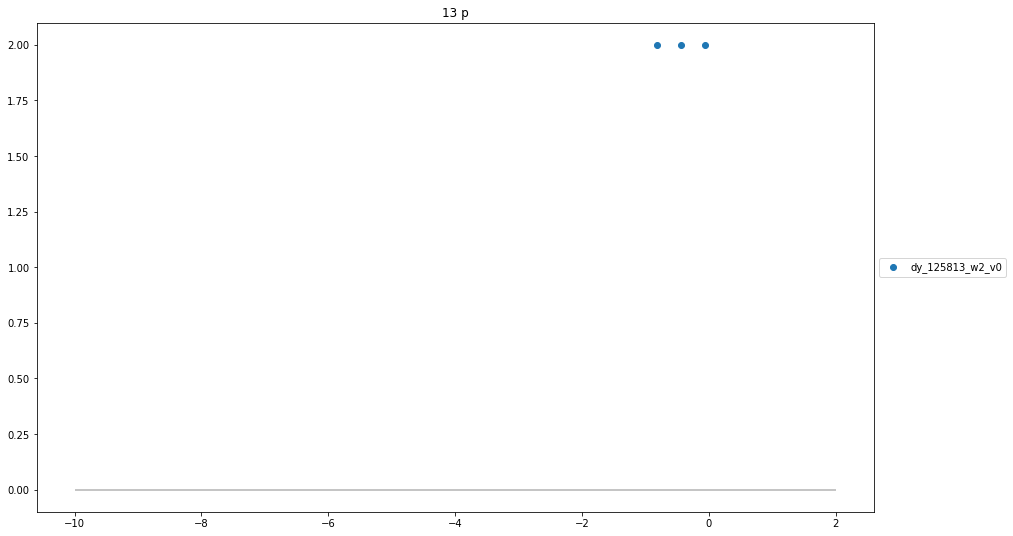

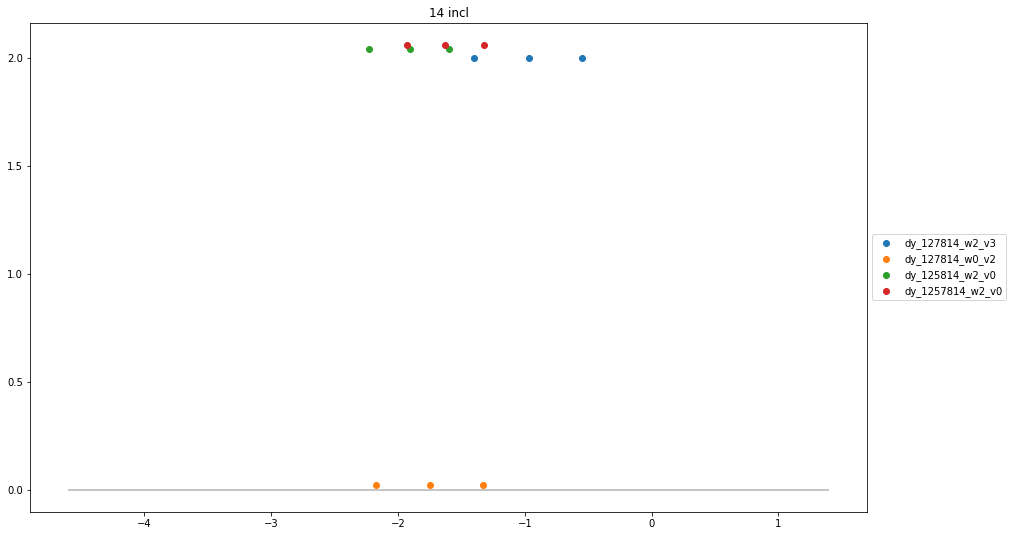

In [16]:
for i in range(15):
    if len(fit[i])>0:
        plt.figure(figsize=(15,9))
        plt.title(str(i)+" "+param_names[i])
        for j in range(len(fit[i])):
            w=int(fit[i][j]['label'][-4:-3])
            plt.scatter(fit[i][j]["dist"],np.zeros(3)+w+(0.02*j),label=fit[i][j]['label'])
        plt.hlines(0,xmin=priors[i][0],xmax=priors[i][1],alpha=0.3)
        plt.xlim=(0,100)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

In [7]:
np.save("fit.npy",fit)

In [11]:
fit[0]

[{'dist': array([ 9.51534224,  9.78384344, 10.02827762]),
  'label': 'dy_01289_w0_v3'},
 {'dist': array([11.94960117, 12.29710619, 12.69238561]),
  'label': 'dy_01258_w2_v0'},
 {'dist': array([11.76009872, 12.1963385 , 12.65361452]),
  'label': 'dy_01258_w5_v0'}]

In [20]:
posteriors=np.ones(16)*-100
posteriors[0]=5
for i in range(len(fit)):
    for j in range(len(fit[i])):
        a=fit[i][j]['dist'][1]
        if a>posteriors[i+1] and int(fit[i][j]['label'][-4:-3])==2:
            posteriors[i+1]=a

In [21]:
np.save("posteriors.npy",posteriors)

In [14]:
np.load("./dy_125813_w2_v0/dynesty_samples.npy").shape

(24810, 6)

In [ ]:
rt=[11.84,7.68,9.54,11.05,11.7,20.7,9.94,13.08,10.36,12.41,10.62,9.64,39.85,9.48]
plt.figure(figsize=(15,6))
plt.scatter(rt,np.ones_like(rt))
plt.scatter(np.quantile(rt,[.33,.5,.67]),np.ones(3))
plt.show()